## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [7]:
df.query("converted == 1")["user_id"].count()

35237

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.query("group == 'treatment' and landing_page != 'new_page'").count()[0]

1965

f. Do any of the rows have missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [29]:
df2 = df[( (df.group == 'treatment') & (df.landing_page == 'new_page') ) | \
         ( (df.group == 'control') & (df.landing_page == 'old_page') ) ]

In [31]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == \
     (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df3 = pd.concat(g for _, g in df2.groupby("user_id") if len(g) > 1)
df3.head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df3.head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [32]:
df2 = df[( (df.group == 'treatment') & (df.landing_page == 'new_page') ) | \
         ( (df.group == 'control') & (df.landing_page == 'old_page') ) ]\
        .drop_duplicates(['user_id'], keep='last')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [46]:
converted_in_control = df2[df2['group'] == 'control'].converted.mean()
converted_in_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [47]:
converted_in_treatement = df2[df2['group'] == 'treatment'].converted.mean()
converted_in_treatement

0.11880806551510564

d. What is the probability that an individual received the new page?

In [8]:
received_new_page = df2[df2.landing_page == 'new_page'].count()[0]
received_new_page / df2.shape[0]

0.50006194422266881

In [49]:
diffs_conversion = converted_in_treatement - converted_in_control 
diffs_conversion

-0.0015782389853555567

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**From the result you can see, the control page, let's see the old page has slightly more conversion than th treatment group which is the new page, but if you can see the probability of the individual received the new page is 50%, so this is quite far, half visits go to new page and half visits go for the old page. From this result, we see that the impact of the new page actually is not big. But the new page might does not run enough time, so we might get bias from novelity and change aversion. I would suggest to run longer time to see the impact.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Let's build the hypothesis as H0 as null_val, H1 is the alternative hypothese. 
My H0 will be the conversion rate of the old page is equal or more than new page:
H0 : P_old - P_new => 0
H1 will be the conversion rate of the old page is less than new page:
H1: P_old - P_new <0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [4]:
df2.groupby("landing_page").converted.mean()

landing_page
new_page    0.118808
old_page    0.120386
Name: converted, dtype: float64

In [29]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [30]:
n_new= df2.query("landing_page == 'new_page'").count()[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
n_old= df2.query("landing_page == 'old_page'").count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1-p_new), p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1-p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
new_page_converted.mean() - old_page_converted.mean()

0.00014946921526451384

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [42]:
new_random_binomial = np.random.binomial(n_new, p_new, 10000).mean()
old_random_binomial = np.random.binomial(n_old, p_old, 10000).mean()
p_diffs = new_random_binomial - old_random_binomial

2.9169999999976426

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

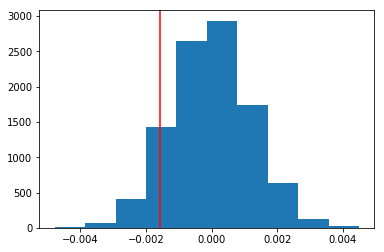

In [50]:
plt.hist(p_diffs);
plt.axvline(x=diffs_conversion, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [51]:
(p_diffs > diffs_conversion).mean()

0.90310000000000001

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**As we can see the P-value is 0.9, is almost 1, is quite large, so we will accept the H0, keep using the old_page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [8]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].converted.size
n_new = df2[df2['group'] == 'treatment'].converted.size

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest( [ convert_new, convert_old ],\
                   [ n_new, n_old ], alternative='larger' )
z_score

-1.3109241984234394

In [10]:
p_value

0.90505831275902449

In [11]:
norm.cdf(z_score)

0.094941687240975514

In [12]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z_score is -1.31, it is less than the the critical value 1.95996, we accpet the null hypothesis that the difference between the two proportions is no different from zero. The converstion of old page is is statistically different and better than the conversion rate of new page. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Simple Linear Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [17]:
df2['intercept']=1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['drop'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [18]:
df2['intercept']=1
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [19]:
df2['intercept']=1
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:11:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_value of ab_page is 0.190, but the P_value in part II is 0.9. 
The hypotheses statements affect what our p-value is because it changes what side(s) from the distribution we are calculating the p-value from. In the Part II, we assume that the conversion rate of the old page is better or equal to the converstion rate of the new page, it focuns on seeing whether there is a positive or negative change, so it is a one tail test. But in the Part III, we assume that whether there is impact after the change, we are not comparing the conversion rate itself in old and new page, it is a two tails test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Yes, there are other variable we might be interested in adding in, such as the time spending in the website, how many pages have visited... that might give us a better view to see which page works better, the old one or the new one. 
The disadvantages might be, adding more variables in the model will make it more complex and occur more errors and bias.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [20]:
coutry_file =pd.read_csv('countries.csv')
coutry_file.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [21]:
df3 = df2.join(coutry_file, lsuffix='_caller', rsuffix='_other')
df3.head()

,user_id_caller,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,user_id_other,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,834778.0,UK
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,928468.0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,822059.0,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,711597.0,UK
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,710616.0,UK


In [23]:
df3.country.value_counts()

US    200926
UK     71501
CA     14315
Name: country, dtype: int64

In [24]:
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3.head()

,user_id_caller,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,user_id_other,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,834778.0,UK,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,928468.0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,822059.0,UK,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,711597.0,UK,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,710616.0,UK,0,1,0


In [25]:
df3['intercept'] =1
lm = sm.Logit(df3['converted'], df3[['intercept','treatment','US','UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 May 2018   Pseudo R-squ.:               1.420e-05
Time:                        10:26:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3884
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0041      0.009   -225.027      0.000      -2.022      -1.987
treatment      0.0150      0.011      1.308      0.191      -0.007       0.037
US            -0.0258      0.027     -0.959      0.338      -0.078       0.027
UK             0.0065      0.013      0.485      0.628      -0.020       0.033
==============================================================================
"""

**I choose Canada as the baseline only include the US and UK. As you can see the coef of US is -0,26%, it means from US, there are 0,2% less visitors than Canada, but there are 0,065% more visitors in UK than Canada. And since the P_value is quite large, this is not a statistic significance. **

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])